# Data understanding
In diesem Notebook werden die Daten des [Amtliches Verzeichnis der Strassen](https://www.cadastre.ch/de/services/service/registry/street.html) der swisstopo explorativ begutachtet.

---
## Laden der Daten

In [1]:
import urllib.request
    
url = 'https://data.geo.admin.ch/ch.swisstopo.amtliches-strassenverzeichnis/csv/2056/ch.swisstopo.amtliches-strassenverzeichnis.zip'
filehandle, _ = urllib.request.urlretrieve(url)

Lesen der zipdatei. Die Daten sollten in der Datei pure_str.csv abgelegt sein.

In [2]:
from zipfile import ZipFile

with ZipFile(filehandle, 'r') as zip:
    zip.printdir()
    data = zip.read("pure_str.csv")

File Name                                             Modified             Size
pure_str.csv                                   2022-09-28 02:50:40     23542065
timestamp.txt                                  2022-09-28 03:12:32           10


Mit `chardet` das encoding der Daten herausfinden. Gegebenenfalls installieren `pip install chardet`

In [3]:
import chardet

result = chardet.detect(data)
print(result)
print(type(data))

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
<class 'bytes'>


Daten in ein pandas-Dataframe abfüllen um eine tabelarische Übersicht über die Daten zu erhalten.
Sollte pandas nicht installiert sein `pip install pandas`

In [4]:
from io import StringIO
import pandas as pd

daten = StringIO(str(data,'UTF-8-SIG'))

df = pd.read_csv(daten, encoding='UTF-8-SIG', sep=';')
df.head()

,STR_ESID,STN_LABEL,ZIP_LABEL,COM_FOSNR,COM_NAME,COM_CANTON,STR_TYPE,STR_STATUS,STR_OFFICIAL,STR_VALID,STR_MODIFIED,STR_EASTING,STR_NORTHING
0,10258316,Eggwald,6484 Wassen UR,1220,Wassen,UR,Place,real,True,False,10.09.2022,NaN,NaN
1,10023770,Wiedenweg,4203 Grellingen,2786,Grellingen,BL,Street,real,True,True,09.09.2022,2610733.0,1254311.0
2,10179192,Wuhrbärgli,4253 Liesberg,2788,Liesberg,BL,Street,real,True,True,26.08.2022,2598709.0,1249640.0
3,10250501,Hüethütte Unter Trübsee,6390 Engelberg,1511,Wolfenschiessen,NW,Area,real,True,True,07.08.2021,2671798.0,1184817.0
4,10163108,Heimstenstich,4436 Liedertswil,2890,Liedertswil,BL,Area,real,True,True,03.03.2022,2621856.0,1248672.0


---
## Daten begutachten

Prüfen auf Null-Values. Vor allem in den Spalten `STR_ESID`, `STN_LABEL` und `STR_EASTING`/`STR_NORTHING` interessant. Diese enthalten die Daten mit welchen später gearbeitet wird.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221260 entries, 0 to 221259
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STR_ESID      221260 non-null  int64  
 1   STN_LABEL     221260 non-null  object 
 2   ZIP_LABEL     221260 non-null  object 
 3   COM_FOSNR     221260 non-null  int64  
 4   COM_NAME      221260 non-null  object 
 5   COM_CANTON    221260 non-null  object 
 6   STR_TYPE      220835 non-null  object 
 7   STR_STATUS    221260 non-null  object 
 8   STR_OFFICIAL  221260 non-null  bool   
 9   STR_VALID     221260 non-null  bool   
 10  STR_MODIFIED  221260 non-null  object 
 11  STR_EASTING   220180 non-null  float64
 12  STR_NORTHING  220180 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(7)
memory usage: 19.0+ MB


### Anzahl Strassen pro Kanton

In [6]:
dfCANTON_STR = df.COM_CANTON.value_counts().reset_index()
dfCANTON_STR.columns = ['CANTON','STR_Count']

dfCANTON_STR.head()

,CANTON,STR_Count
0,BE,30642
1,ZH,28662
2,SG,24373
3,AG,16209
4,VD,15139


<Figure size 640x480 with 0 Axes>

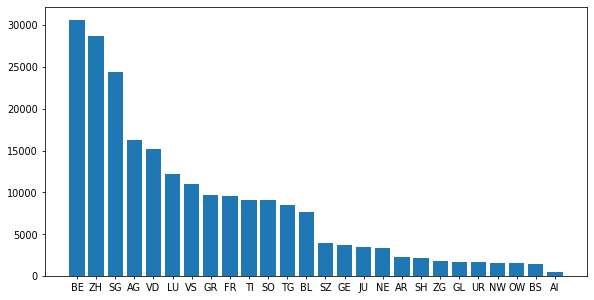

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()

fig, ax = plt.subplots(figsize=(10,5), dpi=70)
cantons = dfCANTON_STR.CANTON
cases = dfCANTON_STR.STR_Count
ax.bar(cantons,cases)
plt.show()

### Statistik

In [8]:
import numpy as np
df.describe(include=object)

,STN_LABEL,ZIP_LABEL,COM_NAME,COM_CANTON,STR_TYPE,STR_STATUS,STR_MODIFIED
count,221260,221260,221260,221260,220835,221260,221260
unique,128528,6881,2135,26,3,2,234
top,Dorfstrasse,9642 Ebnat-Kappel,Zürich,BE,Street,real,27.08.2022
freq,643,508,2515,30642,171983,221052,23544
